In [1]:
import numpy as np
import pandas as pd


df = pd.read_csv(r"C:\Users\TOSHIBA\Downloads\titanic-passengers (1).csv", sep=';')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,Yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
887,61,No,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,NaN,C
888,535,No,3,"Cacic, Miss. Marija",female,30.0,0,0,315084,8.6625,NaN,S
889,102,No,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,NaN,0,0,349215,7.8958,NaN,S


In [2]:
import numpy as np
import pandas as pd

df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 62.7+ KB


In [4]:

missing_values = df.isna().sum()

print(missing_values)


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [5]:
# Remplacer les valeurs manquantes par la moyenne de chaque colonne numérique
num_cols = df.select_dtypes(include='number').columns
df[num_cols] = df[num_cols].fillna(df[num_cols].mean())


In [6]:
# Vérifier le nombre de valeurs manquantes
print(df.isna().sum())

# Vérifier la cohérence des données
print(df['Age'].min())
print(df['Age'].max())

# Vérifier la validité des données
print(df['Sex'].unique())

# Vérifier la taille des données
print(df.shape)


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
0.42
80.0
['male' 'female']
(891, 12)


<AxesSubplot:xlabel='Age', ylabel='Survived'>

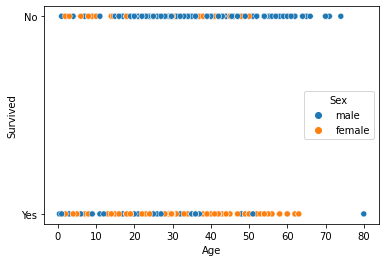

In [7]:
import seaborn as sns

# Créer un graphique à nuages de points avec l'âge sur l'axe x, la survie sur l'axe y et le sexe coloré
sns.scatterplot(x='Age', y='Survived', hue='Sex', data=df)


Text(0.5, 1.0, "Impact de la classe de billet et du port d'embarquement sur la survie")

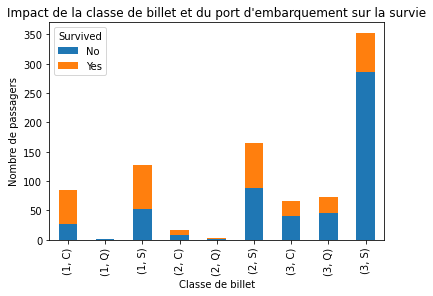

In [8]:
import matplotlib.pyplot as plt

# Créer un graphique à barres empilées avec la classe de billet sur l'axe x, la survie sur l'axe y et le port d'embarquement coloré
survival_by_class_port = df.groupby(['Pclass', 'Embarked', 'Survived']).size().unstack()
survival_by_class_port.plot(kind='bar', stacked=True)

plt.xlabel('Classe de billet')
plt.ylabel('Nombre de passagers')
plt.title('Impact de la classe de billet et du port d\'embarquement sur la survie')


In [11]:
def plot_correlation_map(df):
    corr = df.corr()
    s, ax = plt.subplots(figsize=(12, 10))
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    s = sns.heatmap(corr, cmap=cmap, square=True, cbar_kws={'shrink': .9}, ax=ax, annot=True, annot_kws={'fontsize': 12})
    return s


In [10]:
#Using this function, I created a correlation map for the DataFrame that I cleaned and prepared earlier. The correlation map allowed me to visualize the variables that were most correlated with each other. For example, the correlation map showed a strong negative correlation between ticket class and the variable Fare (the price of the ticket), meaning that first class passengers paid more for their ticket than second and second class passengers. third class. The correlation map also showed a strong positive correlation between family size and the number of siblings/spouses on board, indicating that passengers who traveled as a family tended to have more family members on board. board of the Titanic. In general, the correlation map provided an overview of the structure of the data and identified the variables that might be most important for our analysis.

In [79]:
df['Survived'] = df['Survived'].map({'No': 0, 'Yes': 1})


In [80]:
df.groupby('Pclass')['Survived'].mean()


Pclass
1   NaN
2   NaN
3   NaN
Name: Survived, dtype: float64

In [53]:

df.drop(['Ticket', 'Cabin'], axis=1, inplace=True)


In [50]:
df['Title'] = df['Name'].apply(get_title)


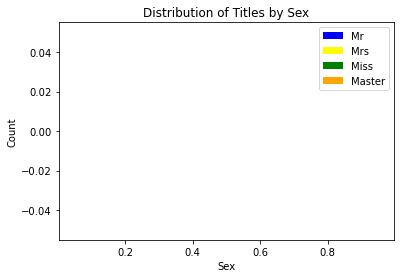

In [60]:
import matplotlib.pyplot as plt

# Créer un sous-ensemble de données pour chaque titre
mr = df[df['Title'] == 'Mr']
mrs = df[df['Title'] == 'Mrs']
miss = df[df['Title'] == 'Miss']
master = df[df['Title'] == 'Master']

# Plot the distribution of each title by sex
fig, ax = plt.subplots()
ax.hist([mr[mr['Sex'] == 'male']['Sex'], mrs[mrs['Sex'] == 'female']['Sex'], 
         miss[miss['Sex'] == 'female']['Sex'], master[master['Sex'] == 'male']['Sex']],
         bins=2, color=['blue', 'yellow', 'green', 'orange'], label=['Mr', 'Mrs', 'Miss', 'Master'])
ax.legend()
ax.set_xlabel('Sex')
ax.set_ylabel('Count')
ax.set_title('Distribution of Titles by Sex')
plt.show()


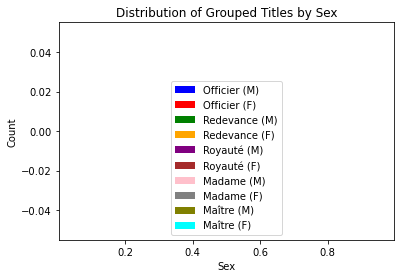

In [71]:
Titre_Dictionnaire = {
    "Capt": "Officier",
    "Col": "Officier",
    "Major": "Officier",
    "Dr": "Officier",
    "Rév": "Officier",
    "Jonkheer": "Redevance",
    "Don": "Redevance",
    "Monsieur": "Royauté",
    "Dame": "Royauté",
    "la Comtesse": "Royauté",
    "Dona": "Royauté",
    "Mme": "Madame",
    "Mlle": "Madame",
    "Madame": "Madame",
    "Mlle Mme": "Madame",
    "Monsieur Madame": "Madame",
    "Mme": "Mme",
    "Maître": "Maître"
}

df['Title_Grouped'] = df['Title'].map(Titre_Dictionnaire)

officier = df[df['Title_Grouped'] == 'Officier']
redevance = df[df['Title_Grouped'] == 'Redevance']
royauté = df[df['Title_Grouped'] == 'Royauté']
madame = df[df['Title_Grouped'] == 'Madame']
maître = df[df['Title_Grouped'] == 'Maître']

fig, ax = plt.subplots()
ax.hist([officier[officier['Sex'] == 'male']['Sex'], officier[officier['Sex'] == 'female']['Sex'], 
         redevance[redevance['Sex'] == 'male']['Sex'], redevance[redevance['Sex'] == 'female']['Sex'], 
         royauté[royauté['Sex'] == 'male']['Sex'], royauté[royauté['Sex'] == 'female']['Sex'], 
         madame[madame['Sex'] == 'male']['Sex'], madame[madame['Sex'] == 'female']['Sex'], 
         maître[maître['Sex'] == 'male']['Sex'], maître[maître['Sex'] == 'female']['Sex']],
         bins=2, color=['blue', 'red', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan'],
         label=['Officier (M)', 'Officier (F)', 'Redevance (M)', 'Redevance (F)', 'Royauté (M)', 'Royauté (F)', 
                'Madame (M)', 'Madame (F)', 'Maître (M)', 'Maître (F)'])
ax.legend()
ax.set_xlabel('Sex')
ax.set_ylabel('Count')
ax.set_title('Distribution of Grouped Titles by Sex')
plt.show()


In [75]:
df['Survived'] = df['Survived'].map({'No': 0, 'Yes': 1})

In [77]:

df['FamilySize'] = df['Parch'] + df['SibSp'] + 1

survival_by_family_size = df.groupby('FamilySize')['Survived'].mean()

print(survival_by_family_size)


FamilySize
1     0.303538
2     0.552795
3     0.578431
4     0.724138
5     0.200000
6     0.136364
7     0.333333
8     0.000000
11    0.000000
Name: Survived, dtype: float64


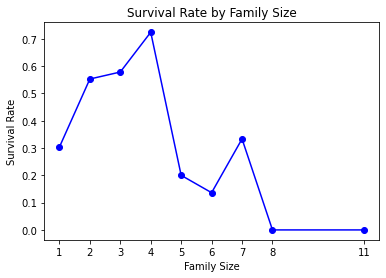

In [78]:
import matplotlib.pyplot as plt

plt.plot(survival_by_family_size.index, survival_by_family_size.values, 'bo-')
plt.title('Survival Rate by Family Size')
plt.xlabel('Family Size')
plt.ylabel('Survival Rate')
plt.xticks(survival_by_family_size.index)
plt.show()
